In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
from pandas import DataFrame
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import metrics

In [2]:
df = pd.read_excel (r'https://www1.nyc.gov/assets/ccrb/downloads/excel/ccrb_datatransparencyinitiative_20170207.xlsx', sheet_name='Complaints_Allegations')
print(df.head())

   DateStamp  UniqueComplaintId  Close Year  Received Year  \
0 2017-02-07                  6        2006           2006   
1 2017-02-07                 11        2006           2006   
2 2017-02-07                 20        2006           2005   
3 2017-02-07                 20        2006           2005   
4 2017-02-07                 20        2006           2005   

  Borough of Occurrence  Is Full Investigation  Complaint Has Video Evidence  \
0              Brooklyn                  False                         False   
1                 Bronx                  False                         False   
2                 Bronx                  False                         False   
3                 Bronx                  False                         False   
4                 Bronx                  False                         False   

     Complaint Filed Mode Complaint Filed Place  \
0                   Phone                   IAB   
1                   Phone                   

In [3]:
df.to_csv('Complains.csv')

               Complains
Incident Year           
2013               14815
2014               13532
2015               12627
2016               10304


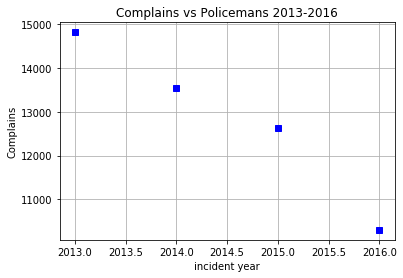

In [97]:
df2=df
df3=df2[df2['Incident Year'] > 2012]
df3=df3[df3['Incident Year'] < 2017]

dfp=df3.pivot_table('Borough of Occurrence', 'Incident Year', aggfunc='count').fillna(0).astype(int)
dfp.columns =['Complains']
print(dfp)

fig, ax = plt.subplots()
ax.plot(dfp, 'bs')

ax.set(xlabel='incident year', ylabel='Complains',
       title='Complains vs Policemans 2013-2016')
ax.grid()
fig.savefig("Complains.png")
plt.show();

In [98]:
df4=df3[df3['Incident Year'] < 2017]
dfp2=df4.pivot_table(index=['Incident Year','Borough of Occurrence', 'Incident Location', 'Allegation FADO Type'], values='DateStamp', aggfunc='count', fill_value=0) 
dfp2.columns = ['Complains']
dfp2.to_csv('Pivot.csv')
dfp4 =pd.read_csv('Pivot.csv')
print(dfp4)

     Incident Year Borough of Occurrence Incident Location  \
0             2013                 Bronx   Apartment/house   
1             2013                 Bronx   Apartment/house   
2             2013                 Bronx   Apartment/house   
3             2013                 Bronx   Apartment/house   
4             2013                 Bronx               Bus   
..             ...                   ...               ...   
911           2016         Staten Island            School   
912           2016         Staten Island    Street/highway   
913           2016         Staten Island    Street/highway   
914           2016         Staten Island    Street/highway   
915           2016         Staten Island    Street/highway   

    Allegation FADO Type  Complains  
0     Abuse of Authority        313  
1            Discourtesy         99  
2                  Force        163  
3     Offensive Language         11  
4     Abuse of Authority          3  
..                   ...   

In [99]:
dfp5 = dfp4[dfp4['Incident Year'] < 2016]
X = dfp5.drop("Complains", axis=1)
y = dfp5['Complains']
categorical_feature_mask = X.dtypes==object
categorical_cols = X.columns[categorical_feature_mask].tolist()

le = LabelEncoder()
X[categorical_cols] = X[categorical_cols].apply(lambda col: le.fit_transform(col))
X[categorical_cols].head(10)

,Borough of Occurrence,Incident Location,Allegation FADO Type
0,0,0,0
1,0,0,1
2,0,0,2
3,0,0,3
4,0,1,0
5,0,1,1
6,0,1,2
7,0,2,0
8,0,2,1
9,0,2,2


In [100]:
dfp6 = dfp4[dfp4['Incident Year']==2016]
Xtest = dfp6.drop("Complains", axis=1)
ytest = dfp6['Complains']
categorical_feature_mask = Xtest.dtypes==object
categorical_cols = Xtest.columns[categorical_feature_mask].tolist()

letest = LabelEncoder()
Xtest[categorical_cols] = Xtest[categorical_cols].apply(lambda col: letest.fit_transform(col))
Xtest[categorical_cols].head(10)

,Borough of Occurrence,Incident Location,Allegation FADO Type
693,0,0,0
694,0,0,1
695,0,0,2
696,0,0,3
697,0,1,2
698,0,2,0
699,0,2,1
700,0,2,2
701,0,2,3
702,0,3,0


In [101]:
model = LinearRegression()
model.fit(X,y)
ypred=model.predict(Xtest)
print("prediction",int(sum(ypred))," - true value",sum(ytest))
print("raw delta%", int(100 * (sum(ytest)-sum(ypred))/sum(ytest)))
print('MSE: %f' % metrics.mean_squared_error(ytest, ypred))
print('MAE: %f' % metrics.mean_absolute_error(ytest, ypred))
print('R^2: %f' % metrics.r2_score(ytest, ypred))

prediction 11031  - true value 10211
raw delta% -8
MSE: 12684.903037
MAE: 62.096548
R^2: 0.093284


In [102]:
model = Ridge()
model.fit(X,y)
ypredridge=model.predict(Xtest)
print("prediction",int(sum(ypred))," - true value",sum(ytest))
print("raw delta%", int(100 * (sum(ytest)-sum(ypredridge))/sum(ytest)))
print('MSE: %f' % metrics.mean_squared_error(ytest, ypredridge))
print('MAE: %f' % metrics.mean_absolute_error(ytest, ypredridge))
print('R^2: %f' % metrics.r2_score(ytest, ypredridge))
print()
print('Ridge and Linear Regressor models are equivalent!')


prediction 11031  - true value 10211
raw delta% -8
MSE: 12685.075171
MAE: 62.097156
R^2: 0.093271

Ridge and Linear Regressor models are equivalent!


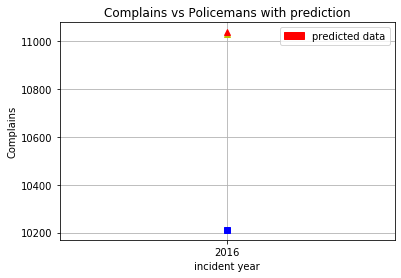

In [103]:
fig, ax = plt.subplots()

arr=np.array([2015, 2016, 2017])
arr=arr.transpose()

ax.plot([2016], sum(ytest), 'bs',  [2016], sum(ypred), 'y^', [2016], sum(ypredridge), 'r^')

ax.set(xlabel='incident year', ylabel='Complains',
       title='Complains vs Policemans with prediction')
ax.set_xticks([2016])

ax.grid()
fig.savefig("Complains_with_2016_prediction.png")

red_patch = mpatches.Patch(color='red', label='predicted data')
plt.legend(handles=[red_patch])

plt.show()

In [104]:
# prediction for 2017
X = dfp4.drop("Complains", axis=1)
y = dfp4['Complains']
categorical_feature_mask = X.dtypes==object
categorical_cols = X.columns[categorical_feature_mask].tolist()

le = LabelEncoder()
X[categorical_cols] = X[categorical_cols].apply(lambda col: le.fit_transform(col))
X[categorical_cols].head(10)

model = LinearRegression()
model.fit(X,y)
ypred=model.predict(Xtest)

               Complains
Incident Year           
2013               14815
2014               13532
2015               12627
2016               10304
2017               10449


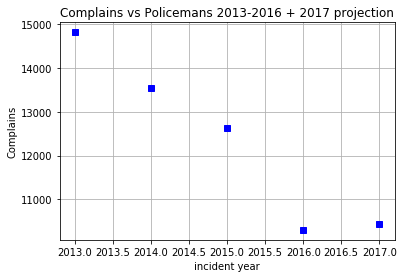

In [105]:
dfp2017=dfp
Complains2017 =int(sum(ypred))
dfp2017.reset_index()
dfp2017.loc[2017]= Complains2017
print(dfp2017)

fig, ax = plt.subplots()
ax.plot(dfp2017, 'bs')

ax.set(xlabel='incident year', ylabel='Complains',
       title='Complains vs Policemans 2013-2016 + 2017 projection')
ax.grid()
fig.savefig("Complains_with_2017_projection.png")
plt.show();